<a href="https://colab.research.google.com/github/JorgeRicardo6050/Tareas-IA-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from collections import Counter

In [12]:
# --- 1. Generación de Datos de Ejemplo ---
training_data = np.array([
    [1.0, 1.0, 0],
    [1.2, 1.5, 0],
    [1.8, 0.5, 0],
    [2.0, 1.2, 0],
    [3.0, 3.0, 1],
    [3.5, 2.5, 1],
    [4.0, 3.8, 1],
    [4.5, 3.2, 1]
])

In [13]:
print("Datos de Entrenamiento:")
print(training_data)
print("-" * 30)

Datos de Entrenamiento:
[[1.  1.  0. ]
 [1.2 1.5 0. ]
 [1.8 0.5 0. ]
 [2.  1.2 0. ]
 [3.  3.  1. ]
 [3.5 2.5 1. ]
 [4.  3.8 1. ]
 [4.5 3.2 1. ]]
------------------------------


In [14]:
new_point = np.array([2.5, 2.0])
print(f"Nuevo Punto a Clasificar: {new_point}")
print("-" * 30)

Nuevo Punto a Clasificar: [2.5 2. ]
------------------------------


--- 2. Implementación del Algoritmo KNN ---

In [15]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [16]:
def knn_predict(training_data, new_point, k=3):
    distances = []
    for i, data_point in enumerate(training_data):
        features = data_point[:-1]
        label = data_point[-1]
        dist = euclidean_distance(new_point, features)
        distances.append((dist, label))
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    neighbor_labels = [label for dist, label in k_nearest_neighbors]
    most_common = Counter(neighbor_labels).most_common(1)
    predicted_class = most_common[0][0]
    return predicted_class, k_nearest_neighbors

In [17]:
# --- 3. Ejecución y Predicción ---
k_value = 3
predicted_class, neighbors = knn_predict(training_data, new_point, k=k_value)

In [18]:
print(f"Para el nuevo punto {new_point} y K = {k_value}:")
print(f"  Los {k_value} vecinos más cercanos son:")
for dist, label in neighbors:
    print(f"    - Distancia: {dist:.2f}, Clase: {int(label)}")

Para el nuevo punto [2.5 2. ] y K = 3:
  Los 3 vecinos más cercanos son:
    - Distancia: 0.94, Clase: 0
    - Distancia: 1.12, Clase: 1
    - Distancia: 1.12, Clase: 1


In [19]:
print(f"  La clase predicha es: {int(predicted_class)}")

  La clase predicha es: 1


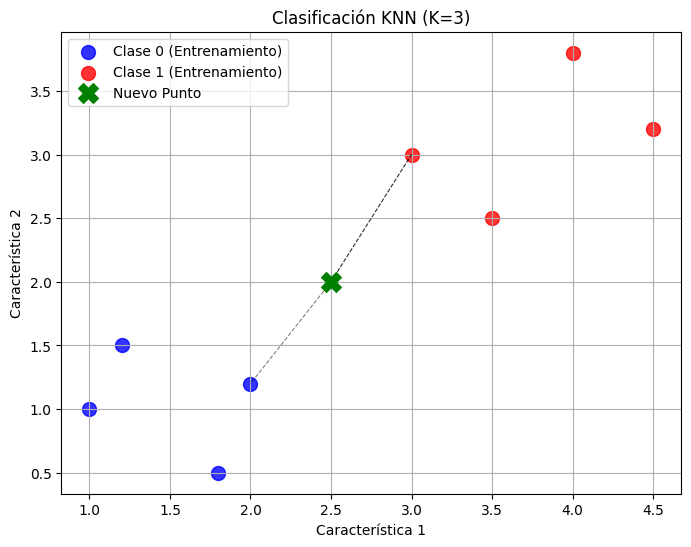

In [20]:
# --- Opcional: Visualización (Requiere matplotlib) ---
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))

    class_0_points = training_data[training_data[:, 2] == 0]
    plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color='blue', label='Clase 0 (Entrenamiento)', s=100, alpha=0.8)

    class_1_points = training_data[training_data[:, 2] == 1]
    plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color='red', label='Clase 1 (Entrenamiento)', s=100, alpha=0.8)

    plt.scatter(new_point[0], new_point[1], color='green', marker='X', s=200, label='Nuevo Punto', zorder=5)

    for dist, label in neighbors:
        for data_p in training_data:
            if np.array_equal(data_p[:-1], new_point):
                continue
            if euclidean_distance(new_point, data_p[:-1]) == dist:
                plt.plot([new_point[0], data_p[0]], [new_point[1], data_p[1]], 'k--', alpha=0.5, linewidth=0.8)
                break

    plt.title(f'Clasificación KNN (K={k_value})')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.grid(True)
    plt.show()

except ImportError:
    print("\nPara la visualización, instala matplotlib: pip install matplotlib")